# 几何空间变换  

### 1.1 缩放resize()  

resize()可以实现图片大小的缩小或放大。  

dst=cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) 

参数含义：
- src：源图像；
- dsize：缩放后目标图像的尺寸，如果设置为0，目标图像则使用源图像的尺寸乘以fx和fy得到；dsize优先级高于fx和fy，如果设置了dsize，后面的fx和fy设置无效；
- fx和fy：dsize未设置的情况下，使用fx和fy分别作为宽度和高度的放大倍数；
- interpolation：插值方法，默认使用双线性插值cv2.INTER_LINEAR；

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [1]:
import cv2

img1 = cv2.imread('./images/lena.jpg')

img_ret1 = cv2.resize(img1,(800,800))
print('img_ret1.shape:',img_ret1.shape) 
cv2.imshow('lena-resize',img_ret1)

img_ret2 = cv2.resize(img1,None,fx=0.5,fy=0.5)
print('img_ret2.shape:',img_ret2.shape)

cv2.imshow('lena-resize2',img_ret2)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_ret1.shape: (800, 800, 3)
img_ret2.shape: (256, 256, 3)


### 1.2 转置transpose()

In [17]:
img1 = cv2.imread('./images/lena.jpg')[:512,:512]
img2 = cv2.imread('./images/opencv_logo.png')[:512,:512]

dst1 = cv2.transpose(img1)
dst2 = cv2.transpose(img2)
cv2.imshow('transpose1 ', dst1) 
cv2.imshow('transpose2 ', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img1[111,222],img2[111,222],dst1[222,111],dst2[222,111]

(array([146, 151, 206], dtype=uint8),
 array([  0,   0, 255], dtype=uint8),
 array([146, 151, 206], dtype=uint8),
 array([  0,   0, 255], dtype=uint8))

### 1.3 翻转flip() 
flip()函数可以实现对图像的水平翻转、垂直翻转和双向翻转。 

dst=cv2.flip(src, flipCode[, dst])
参数含义：

src：源图像；

flipCode：翻转方式，0为水平轴翻转（上下翻转），大于0为垂直轴翻转（左右翻转），小于0做双向翻转。

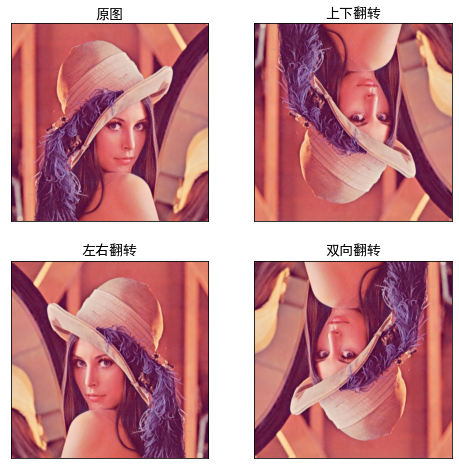

In [20]:
import matplotlib.pyplot as plt
import cv2
img1 = cv2.imread('./images/lena.jpg')[:512,:512]

dst1 = cv2.flip(img1,0)
dst2 = cv2.flip(img1,1)
dst3 = cv2.flip(img1,-1)

images= [img1,dst1,dst2,dst3]
titles = ["原图","上下翻转","左右翻转","双向翻转"]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

并在matplotlib中显示，注意在matplotlib中显示时需要做色彩空间的转换，因为在matplotlib中是以R-G-B格式组织像素的

## 2 仿射变换  

仿射变换的接口形式如下：

dst=cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
参数含义：

src: 输入图像。
M: 2×3 2行3列变换矩阵。
dsize: 输出图像的大小。 

仿射变换
在仿射变换中 原图中所有的平行线在结果图像中同样平行。
为了创建 这个矩阵，我们需要从原图像中找到三个点以及他们在 出图像中的位置。
然后 cv2.getAffineTransform 会创建一个 2x3 的矩  最后 个矩 会 传给 函数 cv2.warpAffine。  

为了找到这个转换矩阵，OpenCV提供了一个函数cv.getRotationMatrix2D。以下示例将图像相对于中心旋转90度而不进行任何缩放。

### 2.1 平移   
通过手动指定算子M=[[1,0,X],[0,1,Y]]可以实现图像的移位，其中X表示向图像x方向（向右）移动的像素值，Y表示图像向y方向（向下）移动的像素值。 

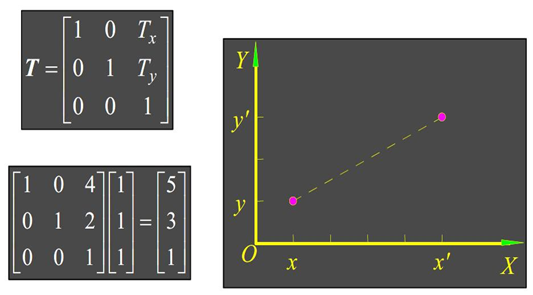

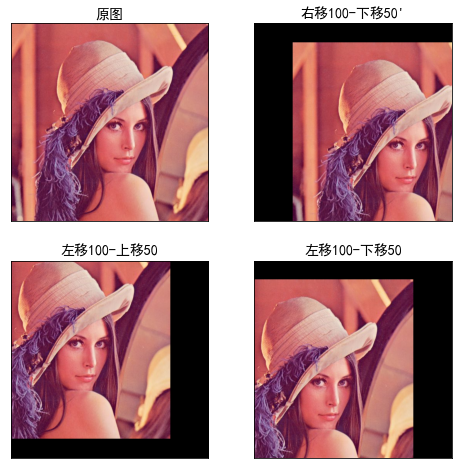

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

img = cv2.imread('./images/lena.jpg')

rows,cols,_ = img.shape 
M = np.float32([[1,0,100],[0,1,50]])   #右移100-下移50
img_ret1 = cv2.warpAffine(img,M,(cols,rows))
M = np.float32([[1,0,-100],[0,1,-50]]) #左移100-上移50
img_ret2 = cv2.warpAffine(img,M,(cols,rows))
M = np.float32([[1,0,-100],[0,1,50]])  #左移100-下移50
img_ret3 = cv2.warpAffine(img,M,(cols,rows))

images= [img,img_ret1,img_ret2,img_ret3]
titles = ["原图","右移100-下移50'","左移100-上移50","左移100-下移50"]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### 2.2 旋转 

不像移位那样可以直观的手动构造算子M，旋转需要先用getRotationMatrix2D()方法构造出warpAffine()的算子M，getRotationMatrix2D()接口形式：

retval=cv2.getRotationMatrix2D(center, angle, scale)

参数含义：

center：旋转中心位置
angle：旋转角度
scale：缩放比例，不缩放时为1  

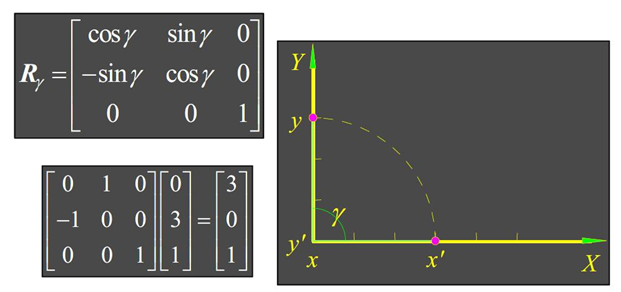

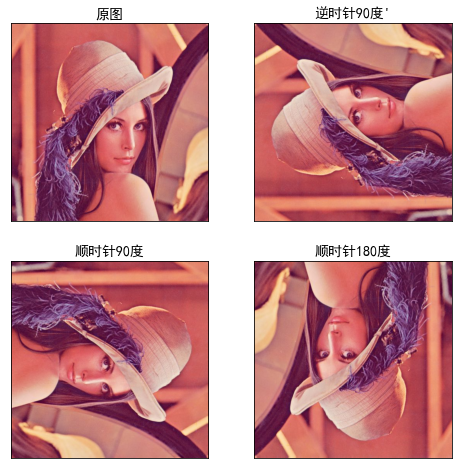

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

img = cv2.imread('./images/lena.jpg')

rows,cols,_ = img.shape

#以图像中心旋转
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)#逆时针90度
img_ret1 = cv2.warpAffine(img,M,(cols,rows))
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),-90,1)#顺时针90度
img_ret2 = cv2.warpAffine(img,M,(cols,rows))
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),-180,1)#顺时针180度
img_ret3 = cv2.warpAffine(img,M,(cols,rows))

#显示图像  
images= [img,img_ret1,img_ret2,img_ret3]
titles = ["原图","逆时针90度","顺时针90度","顺时针180度"]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()



### 2.3 旋转rotate()  

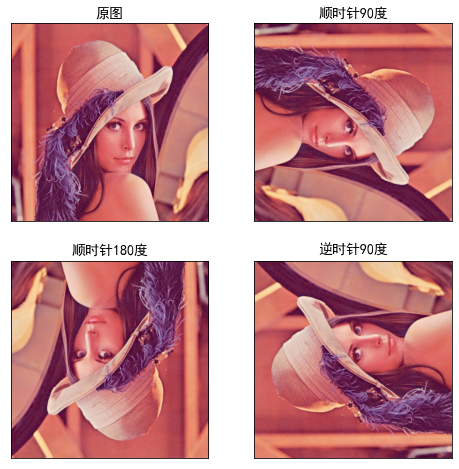

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

img = cv2.imread('./images/lena.jpg')
img_ret1 = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
img_ret2 = cv2.rotate(img,cv2.ROTATE_180)
img_ret3 = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)  

#显示图像  
images= [img,img_ret1,img_ret2,img_ret3]
titles = ["原图","顺时针90度","顺时针180度","逆时针90度"]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


### 2.4 仿射变换  



(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

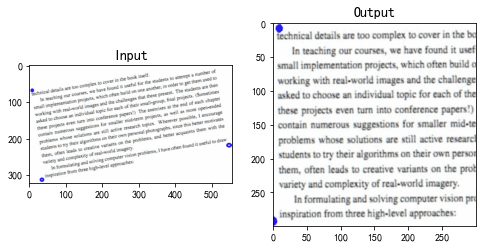

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/image-text.png')
rows, cols, ch = img.shape

pts1 = np.float32([[10,71],[37,320],[550,240]])
pts2 = np.float32([[10,10],[0,300],[550,300]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (300, 300))


plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')


### 2.5 透视变换warpPerspective  
对于透视变换，需要一个3x3变换矩阵。即使在转换之后，直线仍是直线。要找到此变换矩阵，需要在输入图像上找4个点，以及它们在输出图像中的对应位置。在这4个点中，其中任意3个不共线。然后可以通过函数cv.getPerspectiveTransform找到变换矩阵，将cv.warpPerspective应用于此3x3变换矩阵

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

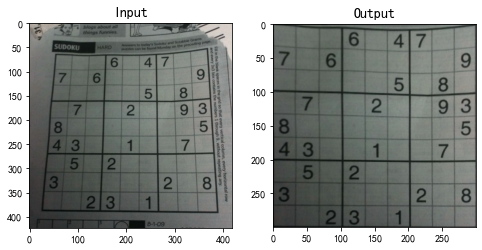

In [27]:
img = cv2.imread('./images/sudoku.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (300, 300))


plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')